# Analyze Financial Data Capstone Project from Codecademy

## In this project I will analyze the following stocks for a portfolio:

- Apple
- Microsoft
- Tesla
- Amazon
- BYD
- NIO
- Biontech
- Netflix
- Disney

## Importing / Downloading Data

The financial data you use in this project is up to you. You can access financial data using one of the APIs accessed through the pandas-datareader package or from websites such as Yahoo Finance. Make sure to find data for at least, but not limited to, four (4) stocks to include in your analysis.

Load the data into a pandas DataFrame so you can easily view and manipulate the data.

In [1]:
# Importing Tools for work
import pandas as pd
import numpy as np
import datetime
import random
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns

# Importing the Data from Yahoo Finance API
# The data ranges from Jan 01, 2020 to May 01, 2021
stocks = ["AAPL", "MSFT", "TSLA", "AMZN", "BYDDF", "NIO", "BNTX", "NFLX", "DIS"]
stocks_data = web.get_data_yahoo(stocks, start = "2020-01-01", end = "2021-06-01")

print(stocks_data.head())

Attributes  Adj Close                                                  \
Symbols          AAPL        MSFT       TSLA         AMZN BYDDF   NIO   
Date                                                                    
2020-01-02  74.207466  158.205765  86.052002  1898.010010  5.08  3.72   
2020-01-03  73.486023  156.235825  88.601997  1874.969971  5.03  3.83   
2020-01-06  74.071579  156.639694  90.307999  1902.880005  5.00  3.68   
2020-01-07  73.723213  155.211456  93.811996  1906.859985  4.94  3.24   
2020-01-08  74.909149  157.683731  98.428001  1891.969971  4.96  3.39   

Attributes                                         Close  ...        Open  \
Symbols          BNTX        NFLX         DIS       AAPL  ...         DIS   
Date                                                      ...               
2020-01-02  38.500000  329.809998  148.199997  75.087502  ...  145.289993   
2020-01-03  40.049999  325.899994  146.500000  74.357498  ...  146.399994   
2020-01-06  44.580002  335.829

## Calculate Financial Statistics

Calculate some of the financial statistics you have learned about to gain insights into the stocks and how they relate to each other. What are the returns of the stocks over different time periods? How risky are each of the stocks when compared to each other? Do the returns of the stocks correlate with each other, or are they diversified?

### Adjusted Daily Closing Prices

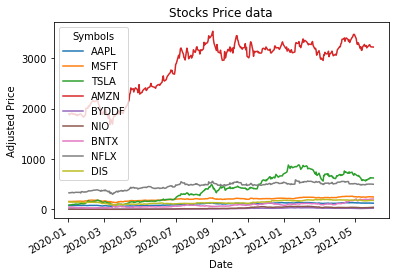

In [2]:
# Taking the ADJ Closing Prices and plot them in a graph
stocks_data['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("Stocks Price data")
plt.rcParams['figure.figsize'] = [32, 20]
plt.rcParams.update({'font.size': 22})

plt.savefig("stocks_price_data.png")
plt.show()

### Adjusted Daily Closing Prices Seperated

<ipython-input-3-dba3932942ce>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(months)
<ipython-input-3-dba3932942ce>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(months)
<ipython-input-3-dba3932942ce>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(months)
<ipython-input-3-dba3932942ce>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(months)
<ipython-input-3-dba3932942ce>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(months)
<ipython-input-3-dba3932942ce>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(months)
<ipython-input-3-dba3932942ce>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_xticklabels(months)
<ipython-input-3-dba

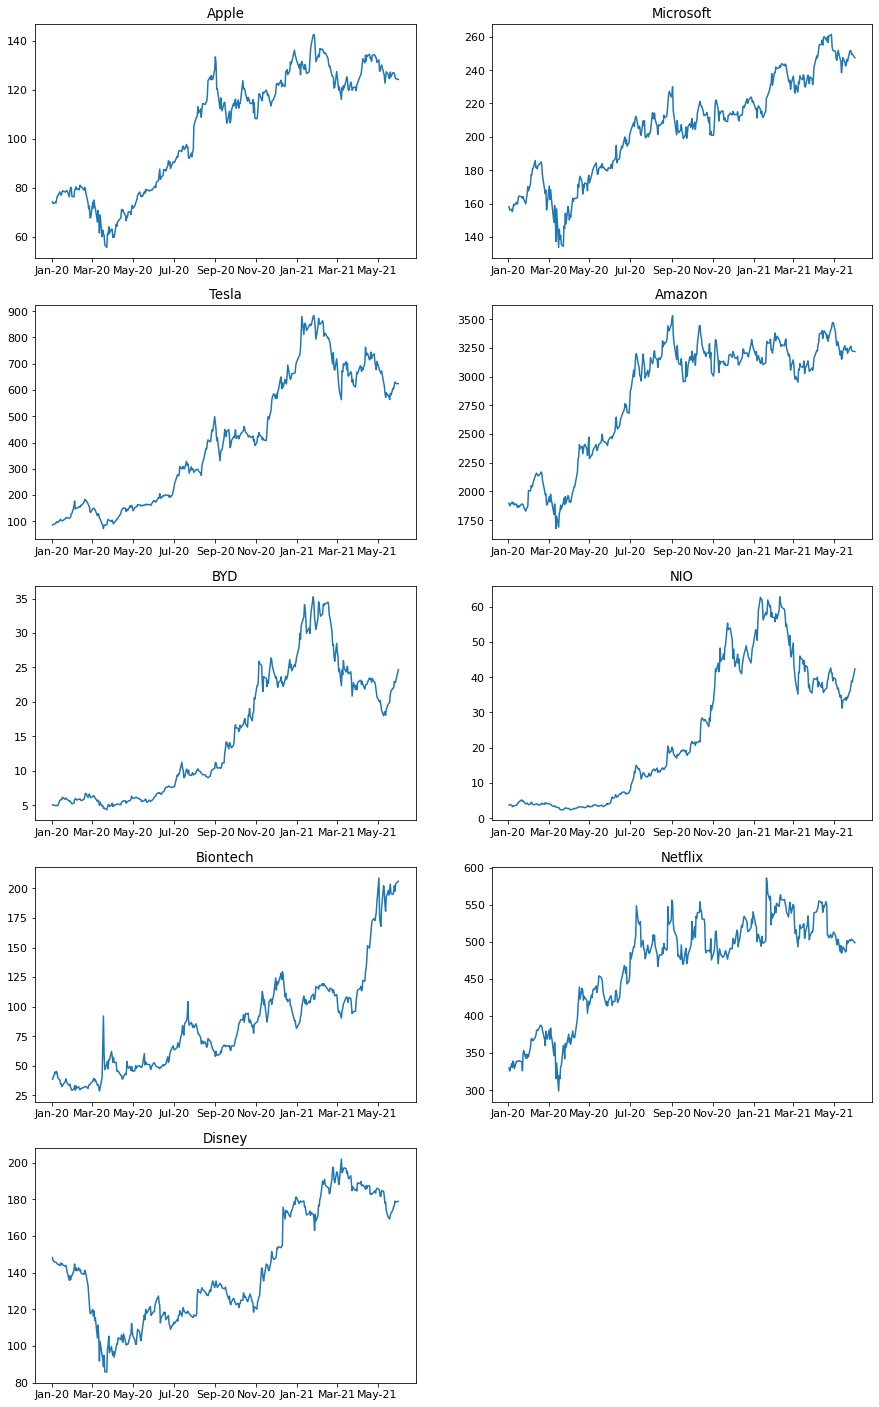

In [3]:
# Taking the ADJ Closing Prices in subplots for every stock
# creating figure and size it
fig = plt.figure(figsize = (32, 20))
plt.rcParams.update({'font.size': 11})
fig.set_figheight(25)
fig.set_figwidth(15)
months = ["Jan-20", "Mar-20", "May-20", "Jul-20", "Sep-20", "Nov-20", "Jan-21", "Mar-21", "May-21"]

# Creating subplots
ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(522)
ax3 = fig.add_subplot(523)
ax4 = fig.add_subplot(524)
ax5 = fig.add_subplot(525)
ax6 = fig.add_subplot(526)
ax7 = fig.add_subplot(527)
ax8 = fig.add_subplot(528)
ax9 = fig.add_subplot(529)
ax1.plot(stocks_data['Adj Close']['AAPL'])
ax1.set_title("Apple")
ax1.set_xticklabels(months)
ax2.plot(stocks_data['Adj Close']['MSFT'])
ax2.set_title("Microsoft")
ax2.set_xticklabels(months)
ax3.plot(stocks_data['Adj Close']['TSLA'])
ax3.set_title("Tesla")
ax3.set_xticklabels(months)
ax4.plot(stocks_data['Adj Close']['AMZN'])
ax4.set_title("Amazon")
ax4.set_xticklabels(months)
ax5.plot(stocks_data['Adj Close']['BYDDF'])
ax5.set_title("BYD")
ax5.set_xticklabels(months)
ax6.plot(stocks_data['Adj Close']['NIO'])
ax6.set_title("NIO")
ax6.set_xticklabels(months)
ax7.plot(stocks_data['Adj Close']['BNTX'])
ax7.set_title("Biontech")
ax7.set_xticklabels(months)
ax8.plot(stocks_data['Adj Close']['NFLX'])
ax8.set_title("Netflix")
ax8.set_xticklabels(months)
ax9.plot(stocks_data['Adj Close']['DIS'])
ax9.set_title("Disney")
ax9.set_xticklabels(months)

plt.savefig("stocks_adj_sep.png")
plt.show()

### Daily & Monthly Returns

<Figure size 2304x1440 with 0 Axes>

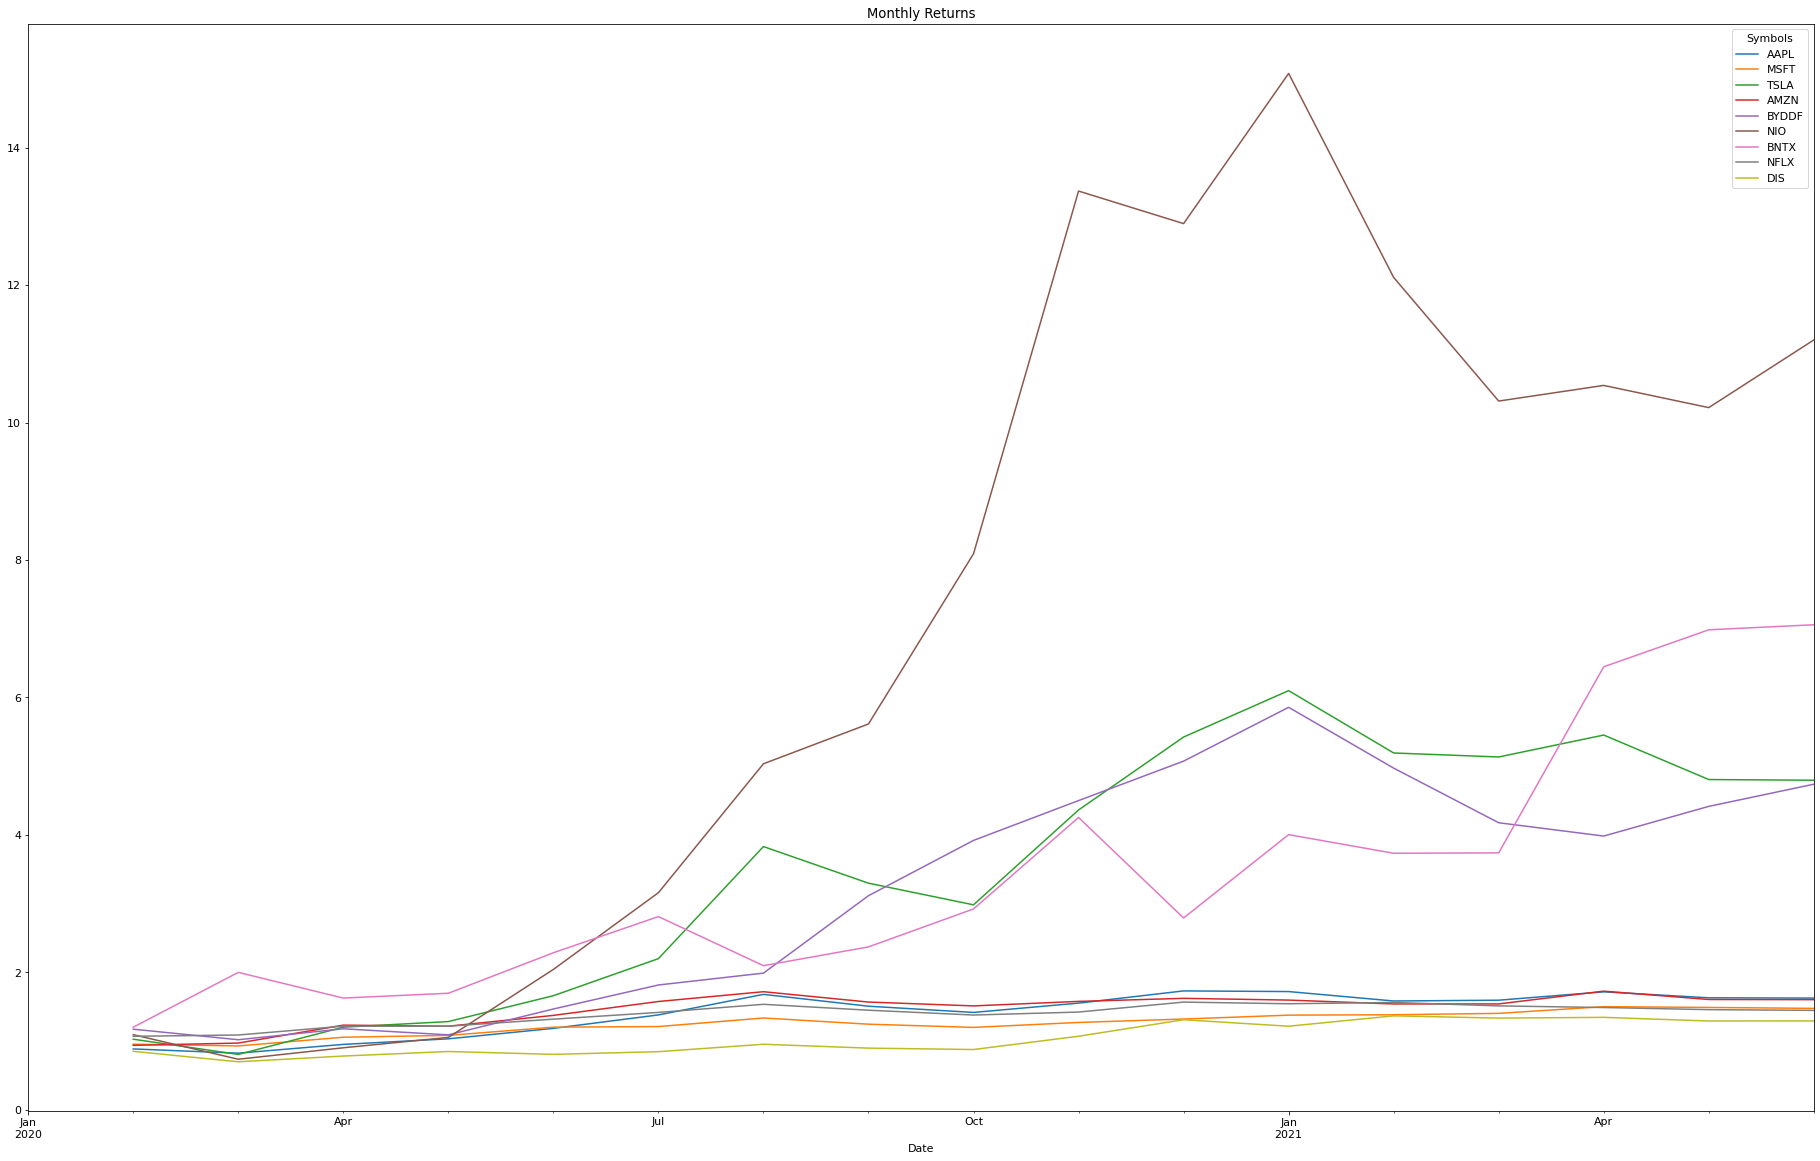

In [4]:
# Calculate the daily & monthly returns, based from price changes
stocks_daily_returns = stocks_data['Adj Close'].pct_change()
stocks_monthly_returns = stocks_data['Adj Close'].resample('M').ffill().pct_change()

fig = plt.figure()
(stocks_monthly_returns + 1).cumprod().plot()
plt.title("Monthly Returns")

plt.rcParams['figure.figsize'] = [32, 20]
plt.rcParams.update({'font.size': 22})
plt.savefig("monthly_returns.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2304x1440 with 0 Axes>

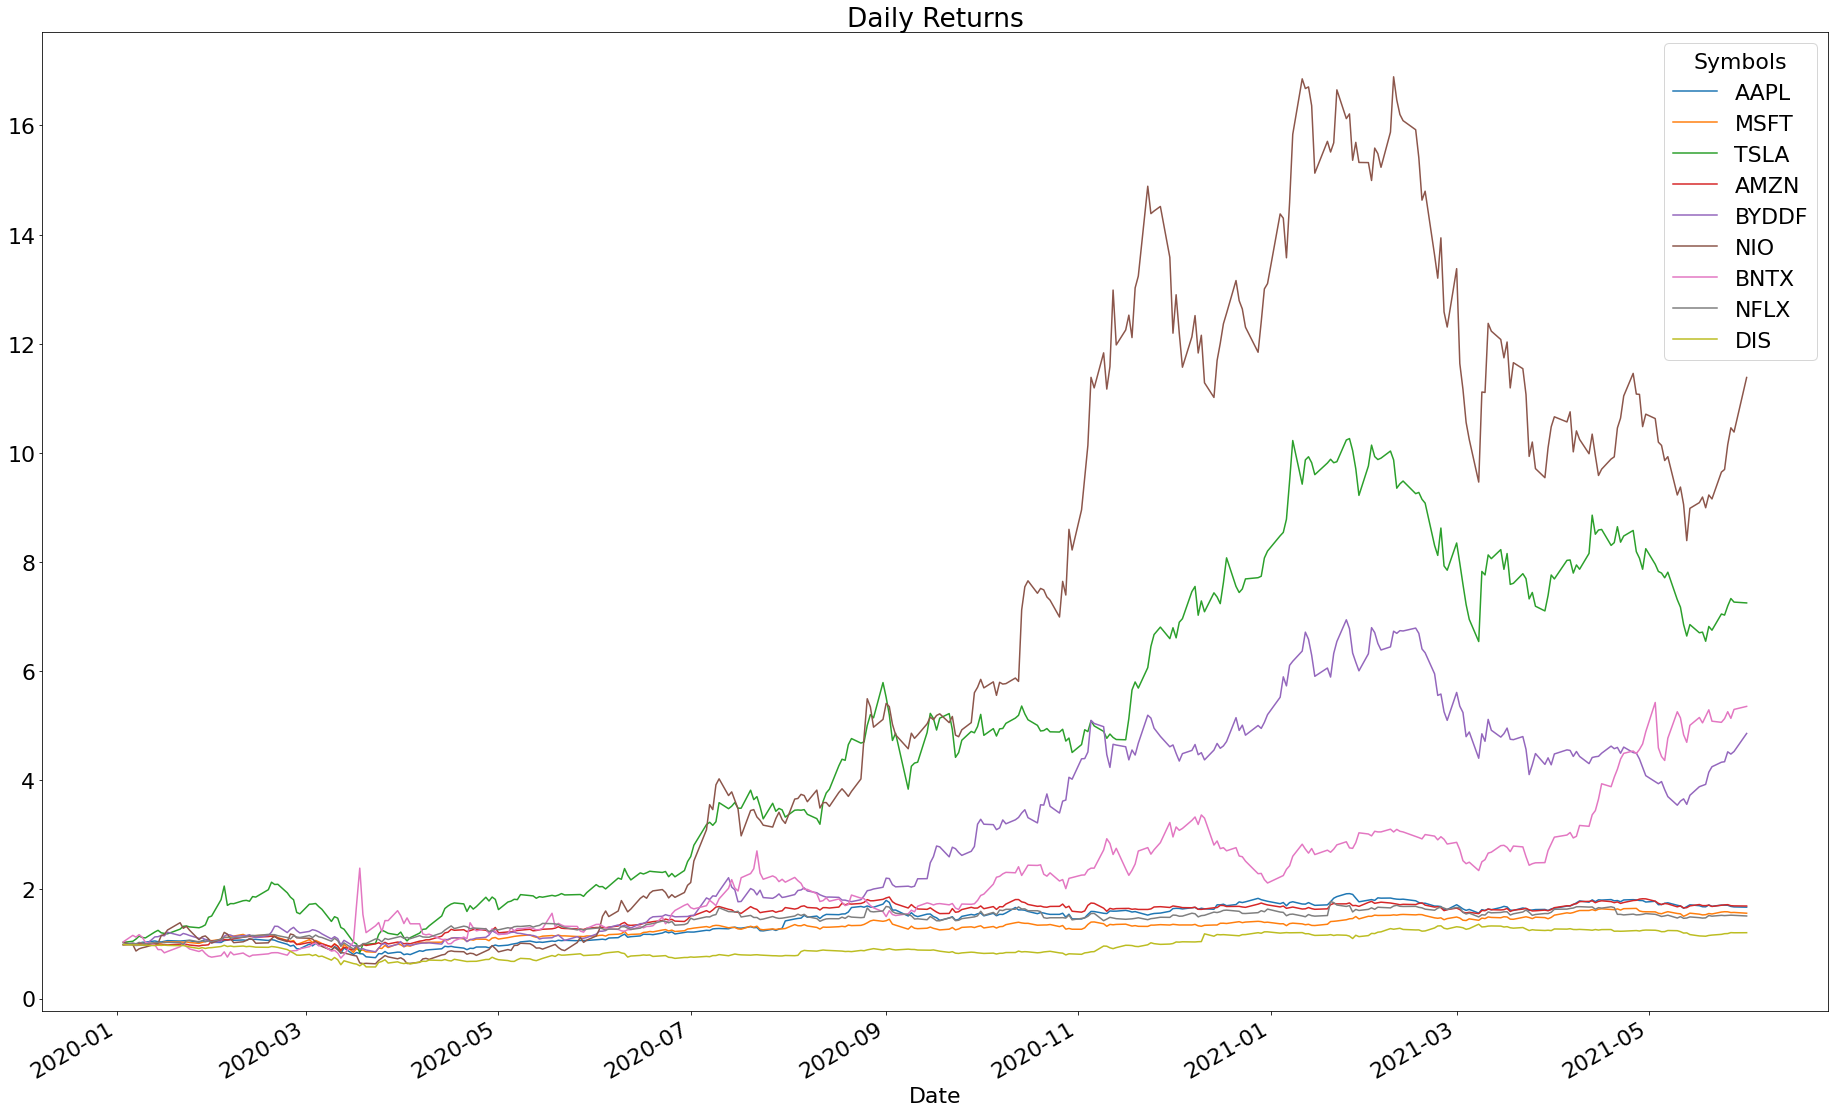

In [5]:
fig = plt.figure()
(stocks_daily_returns + 1).cumprod().plot()
plt.title("Daily Returns")

plt.rcParams['figure.figsize'] = [32, 20]
plt.rcParams.update({'font.size': 22})
plt.savefig("daily_returns.png")
plt.show

### Mean

In [6]:
# Calculating mean of each stock
mean = stocks_data['Adj Close'].mean()
print(mean)

Symbols
AAPL      104.505446
MSFT      205.116715
TSLA      413.411623
AMZN     2837.585781
BYDDF      15.357753
NIO        24.293624
BNTX       84.400449
NFLX      469.194185
DIS       142.877556
dtype: float64


### Standard Deviation

In [21]:
# Calculating the standard deviation of each stock
std = stocks_data['Adj Close'].std()
print(std)

Symbols
AAPL      24.245361
MSFT      29.082954
TSLA     247.092465
AMZN     531.102835
BYDDF      9.434470
NIO       19.697918
BNTX      33.088402
NFLX      68.441692
DIS       30.393539
dtype: float64


### Variance

In [8]:
# Calculating the variance of each stock
var = np.var(stocks_data['Adj Close'])
print(var)

Symbols
AAPL        582.444453
MSFT        904.610638
TSLA      59962.147325
AMZN     275196.766382
BYDDF        85.352626
NIO         372.994715
BNTX       1779.892028
NFLX       4445.658250
DIS         943.872369
dtype: float64


### Covariance

In [9]:
# Calculating the covariance of each stock
cov = stocks_data['Adj Close'].cov()
print(cov)

Symbols          AAPL          MSFT           TSLA           AMZN  \
Symbols                                                             
AAPL       584.085141    677.299313    5538.968758   11734.467517   
MSFT       677.299313    907.158837    6526.627450   14345.712668   
TSLA      5538.968758   6526.627450   60131.054783  104652.782662   
AMZN     11734.467517  14345.712668  104652.782662  275971.968541   
BYDDF      195.181931    221.111632    2167.730970    3562.324195   
NIO        412.802739    461.030613    4524.970929    7567.446316   
BNTX       776.078684   1063.528541    8010.648304   15716.982064   
NFLX      1439.797891   1794.520832   13685.360903   33552.065524   
DIS        579.152373    727.091874    6448.526305    8979.265640   

Symbols        BYDDF          NIO          BNTX          NFLX          DIS  
Symbols                                                                     
AAPL      195.181931   412.802739    776.078684   1439.797891   579.152373  
MSFT     

Assets can have a positive covariance, negative covariance, or no covariance:

- Positive covariance — when one asset increases in value, the other usually increases in value. The covariance value will be greater than 0.
- Negative covariance — when one asset increases in value, the other usually decreases in value. The covariance value will be less than 0.
- Uncorrelated assets — when there is no quantifiable pattern to the response of two assets. The covariance value is equal to 0.

### Correlation

Symbols      AAPL      MSFT      TSLA      AMZN     BYDDF       NIO      BNTX  \
Symbols                                                                         
AAPL     1.000000  0.930467  0.934634  0.924257  0.872936  0.883166  0.760081   
MSFT     0.930467  1.000000  0.883686  0.906667  0.793507  0.791454  0.835795   
TSLA     0.934634  0.883686  1.000000  0.812398  0.955513  0.954123  0.773233   
AMZN     0.924257  0.906667  0.812398  1.000000  0.732962  0.744826  0.708156   
BYDDF    0.872936  0.793507  0.955513  0.732962  1.000000  0.989069  0.711511   
NIO      0.883166  0.791454  0.954123  0.744826  0.989069  1.000000  0.723384   
BNTX     0.760081  0.835795  0.773233  0.708156  0.711511  0.723384  1.000000   
NFLX     0.892246  0.892335  0.835849  0.956551  0.767173  0.762554  0.649559   
DIS      0.778910  0.784658  0.854759  0.555573  0.808704  0.807467  0.694025   

Symbols      NFLX       DIS  
Symbols                      
AAPL     0.892246  0.778910  
MSFT     0.892335 

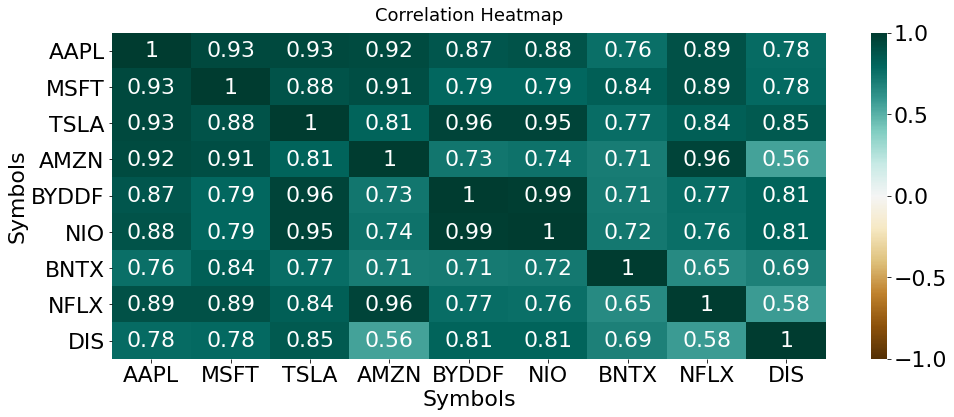

<Figure size 2304x1440 with 0 Axes>

In [10]:
# Calculating the correlation between each stock

corr = stocks_data['Adj Close'].corr()
print(corr)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

The Portfolio is not good diversified, since all stocks have a high correlation to each other. The AMZN/NFLX pair has the highest correlation with 0.959958. The AMZN/DIS pair has the lowest correlation with 0.532303. Also TSLA has a high correlation with BYDDF and NIO, although they come from two different markets (USA and China). 

But also you have to know, that this Portfolio was made, to gain high returns due to the Covid19-Crisis. So it's clear that this "temporary" Portfolio has a high correlation between its stocks.

## Optimized Portfolio

Perform a mean-variance portfolio optimization that shows the efficient frontier for the group of stocks you have selected. If the investor is less risky, how should she allocate her funds across the portfolio? If she is more risky, how should she allocate her funds? Indicate multiple investment options at different risk levels and specify the returns.

In [ ]:
# New optimized Portfolio



In [29]:
stocks = ["AAPL", "MSFT", "TSLA", "AMZN", "BYDDF", "NIO", "BNTX", "NFLX", "DIS"]
stocks_data = web.get_data_yahoo(stocks, start = "2020-01-01", end = "2021-05-01")

# Expected Return I
selected = list(stocks_data.columns[1:])
quarterly_returns = stocks_data[selected].pct_change()
expected_returns_avg = quarterly_returns.mean()

#print(expected_returns_avg)

# Expected Return II
# You have CHF 90'000 to invest and you invest CHF 10'000 in each stock.
weight_msft = 10000 / 90000
weight_tsla = 10000 / 90000
weight_amzn = 10000 / 90000
weight_byddf = 10000 / 90000
weight_nio = 10000 / 90000
weight_bntx = 10000 / 90000
weight_nflx = 10000 / 90000
weight_dis = 10000 / 90000
weight_appl = 10000 / 90000

# Expected Return III
expected_return = weight_msft * 0.001707 + weight_tsla * 0.007765 + weight_amzn * 0.002057 + weight_byddf * 0.005225 + weight_nio * 0.008950 + weight_bntx * 0.007336 + weight_nflx * 0.001739 + weight_dis * 0.001075 + weight_appl * 0.002050
print(expected_return)

# Efficient Frontier
returns_quarterly = stocks_data[selected].pct_change()
expected_returns = returns_quarterly.mean()
cov_quarterly = np.cov(returns_quarterly)

# Volatility of all stocks
#stocks_data["Adj Close"].pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

0.004211555555555556


## Create Your Presentation

We want to see:

- information about the stocks you utilized (industry, sector, background, news)
- the key financial statistics about the stocks and how you interpret them
- a few different portfolio options with the stock weights and why the investor would select that portfolio
- an overall conclusion to the client about your recommendations

## Share Your Presentation

1. Save your presentation as a Google Slide or some other presentation format
2. Post your presentation on the Codecademy forum. More details describing how to post your code can be found in the following informational.

Good luck!